In [1]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuryk
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | pavlohrad
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | launceston
Processing Record 9 of Set 1 | berdigestyakh
Processing Record 10 of Set 1 | teya
Processing Record 11 of Set 1 | montrose
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | outjo
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | lasa
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | soyo
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | hilo
Proce

Processing Record 38 of Set 4 | rosarito
Processing Record 39 of Set 4 | ternate
Processing Record 40 of Set 4 | bakurianis andeziti
Processing Record 41 of Set 4 | atraulia
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | iquitos
Processing Record 45 of Set 4 | iralaya
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | westport
Processing Record 1 of Set 5 | hervey bay
Processing Record 2 of Set 5 | buala
Processing Record 3 of Set 5 | nenjiang
Processing Record 4 of Set 5 | marshall
Processing Record 5 of Set 5 | san rafael
Processing Record 6 of Set 5 | barnaul
Processing Record 7 of Set 5 | tagusao
Processing Record 8 of Set 5 | hay river
Processing Record 9 of Set 5 | tairua
Processing Record 10 of Set 5 | ahipara
Processing Record 11 of Set 5 | rodez
Processing Record 12 o

Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | mount gambier
Processing Record 30 of Set 8 | yatou
Processing Record 31 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 32 of Set 8 | odolena voda
Processing Record 33 of Set 8 | shahr-e babak
Processing Record 34 of Set 8 | matadi
Processing Record 35 of Set 8 | lockhart
Processing Record 36 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 8 | college
Processing Record 38 of Set 8 | livramento
Processing Record 39 of Set 8 | voznesenye
Processing Record 40 of Set 8 | mayo
Processing Record 41 of Set 8 | vangaindrano
Processing Record 42 of Set 8 | kegayli
City not found. Skipping...
Processing Record 43 of Set 8 | rafaela
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | nome
Processing Record 46 of Set 8 | borogontsy
Processing Record 47 of Set 8 | teguise
Processing Record 48 of Set 8 | velykyy klyuchiv
Processing Record 49 of Set 8 

City not found. Skipping...
Processing Record 14 of Set 12 | korla
Processing Record 15 of Set 12 | ovalle
Processing Record 16 of Set 12 | sydney
Processing Record 17 of Set 12 | talara
Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | ararangua
Processing Record 20 of Set 12 | sobolevo
Processing Record 21 of Set 12 | jalu
Processing Record 22 of Set 12 | chiquinquira
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | tarko-sale
Processing Record 25 of Set 12 | montepuez
Processing Record 26 of Set 12 | jamkhed
Processing Record 27 of Set 12 | gulshat
City not found. Skipping...
Processing Record 28 of Set 12 | bowen
Processing Record 29 of Set 12 | eenhana
Processing Record 30 of Set 12 | weligama
Processing Record 31 of Set 12 | havre-saint-pierre
Processing Record 32 of Set 12 | havre
Processing Record 33 of Set 12 | vanderhoof
Processing Record 34 of Set 12 | shahreza
Processing Record 35 of Set 12 | yuanli
Processing Record 36 of 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kuryk,43.2000,51.6500,62.01,38,100,14.63,KZ,2022-05-03 04:46:09
1,Kruisfontein,-34.0033,24.7314,63.16,41,96,7.85,ZA,2022-05-03 04:46:10
2,Pavlohrad,48.5167,35.8667,53.33,59,20,5.59,UA,2022-05-03 04:46:10
3,Punta Arenas,-53.1500,-70.9167,42.91,70,100,14.97,CL,2022-05-03 04:44:51
4,Kapaa,22.0752,-159.3190,80.58,86,75,20.71,US,2022-05-03 04:45:05
5,Bluff,-46.6000,168.3333,60.80,70,46,4.90,NZ,2022-05-03 04:46:11
6,Launceston,-41.4500,147.1667,64.62,72,100,21.85,AU,2022-05-03 04:46:12
7,Berdigestyakh,62.0989,126.6992,32.02,66,77,5.35,RU,2022-05-03 04:46:12
8,Teya,60.3778,92.6267,35.24,92,99,12.84,RU,2022-05-03 04:46:13
9,Montrose,38.4166,-108.2673,49.57,31,16,8.10,US,2022-05-03 04:46:13


In [11]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kuryk,KZ,2022-05-03 04:46:09,43.2000,51.6500,62.01,38,100,14.63
1,Kruisfontein,ZA,2022-05-03 04:46:10,-34.0033,24.7314,63.16,41,96,7.85
2,Pavlohrad,UA,2022-05-03 04:46:10,48.5167,35.8667,53.33,59,20,5.59
3,Punta Arenas,CL,2022-05-03 04:44:51,-53.1500,-70.9167,42.91,70,100,14.97
4,Kapaa,US,2022-05-03 04:45:05,22.0752,-159.3190,80.58,86,75,20.71
5,Bluff,NZ,2022-05-03 04:46:11,-46.6000,168.3333,60.80,70,46,4.90
6,Launceston,AU,2022-05-03 04:46:12,-41.4500,147.1667,64.62,72,100,21.85
7,Berdigestyakh,RU,2022-05-03 04:46:12,62.0989,126.6992,32.02,66,77,5.35
8,Teya,RU,2022-05-03 04:46:13,60.3778,92.6267,35.24,92,99,12.84
9,Montrose,US,2022-05-03 04:46:13,38.4166,-108.2673,49.57,31,16,8.10


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

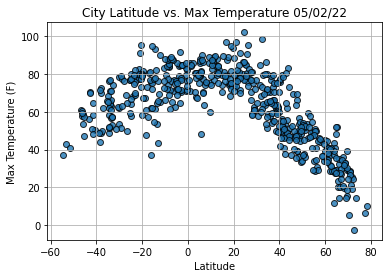

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/LatVsMaxTemp.png")

# Show plot.
plt.show()

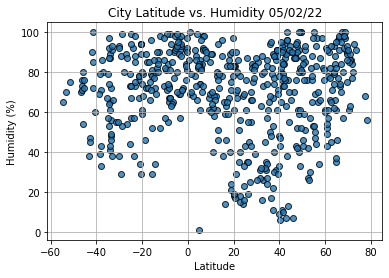

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsHumidity.png")
# Show plot.
plt.show()

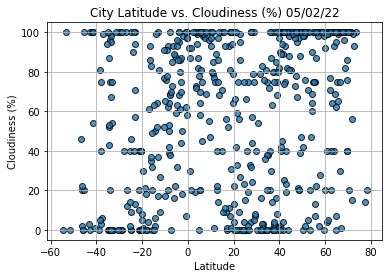

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsCloudiness.png")
# Show plot.
plt.show()

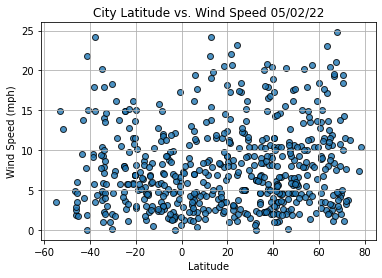

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsWindSpeed.png")
# Show plot.
plt.show()